# **Movie Poster Genre Classification using CNN:**

#### Thirumurugan Ramar 

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 22kB/s 
     |████████████████████████████████| 4.3MB 50.4MB/s 
     |████████████████████████████████| 501kB 48.3MB/s 


In [0]:
# Imports
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# downloading dataset from Kgp talkie dataset hosted in Github
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Counting objects: 100% (7873/7873), done.
remote: Compressing objects: 100% (7873/7873), done.
remote: Total 7873 (delta 1), reused 7872 (delta 0), pack-reused 0
Receiving objects: 100% (7873/7873), 246.59 MiB | 55.07 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [4]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
data.shape

(7254, 27)

In [6]:
# Wrapping up images using tqdm
from tqdm import tqdm

img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:30<00:00, 238.15it/s]


In [8]:
X

array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00784314, 0.        ]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00784314, 0.        ]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00784314, 0.        ]],

        ...,

        [[0.11372549, 0.11372549, 0.11372549],
         [0.00784314, 0.00784314, 0.00784314]

In [9]:
X.shape

(7254, 350, 350, 3)

GENRE OF THE MOVIE ['Action', 'Comedy', 'Sci-Fi']


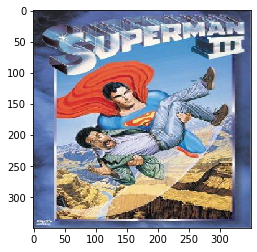

In [13]:
plt.imshow(X[10])
print('GENRE OF THE MOVIE',data['Genre'][10])

In [14]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [15]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [0]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

In [18]:
# image shape
X_train[0].shape

(350, 350, 3)

In [19]:
y_test[0].shape

(25,)

## **CNN IMPLEMENTATION:**

In [0]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())  # automatially standardises the layer and accelerates the neural network
model.add(MaxPool2D(2,2))        #use Max Pooling to reduce the spatial dimensions of the output volume.
model.add(Dropout(0.3))

In [0]:
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

In [0]:
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

In [0]:
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

In [0]:
model.add(Flatten())  # flattening input to add dense layers

In [0]:
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [0]:
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [0]:
model.add(Dense(25, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 346, 346, 16)      2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 346, 346, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 173, 173, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 173, 173, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 171, 171, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 171, 171, 32)      1

In [0]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6165/6165 [==============================] - 1103s 179ms/sample - loss: 0.6986 - accuracy: 0.6395 - val_loss: 0.5299 - val_accuracy: 0.8385
Epoch 2/5
6165/6165 [==============================] - 1079s 175ms/sample - loss: 0.3132 - accuracy: 0.8886 - val_loss: 0.2579 - val_accuracy: 0.9110
Epoch 3/5
6165/6165 [==============================] - 1083s 176ms/sample - loss: 0.2614 - accuracy: 0.9063 - val_loss: 0.2422 - val_accuracy: 0.9111
Epoch 4/5
6165/6165 [==============================] - 1104s 179ms/sample - loss: 0.2512 - accuracy: 0.9090 - val_loss: 0.2469 - val_accuracy: 0.9096
Epoch 5/5
6165/6165 [==============================] - 1056s 171ms/sample - loss: 0.2458 - accuracy: 0.9109 - val_loss: 0.2415 - val_accuracy: 0.9111


In [0]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

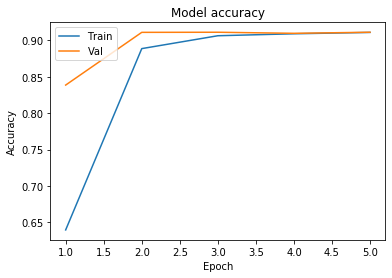

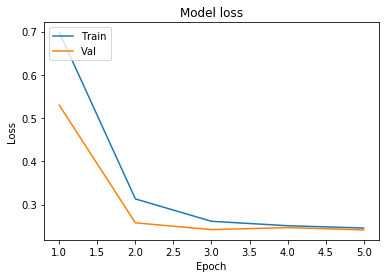

In [32]:
plot_learningCurve(history, 5)

In [35]:
# Testing the model:
from google.colab import files
uploaded = files.upload()

Saving Saaho_poster.jpg to Saaho_poster.jpg


Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Comedy
Action


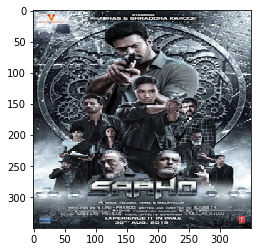

In [36]:
img = image.load_img('Saaho_poster.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [43]:
from google.colab import files
uploaded = files.upload()

Saving 127 hours.jpg to 127 hours.jpg


Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Thriller
Documentary


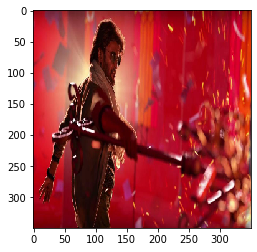

In [41]:
img = image.load_img('petta.jpeg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Horror
Thriller


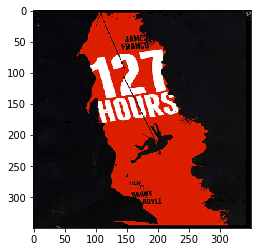

In [44]:
img = image.load_img('127 hours.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [49]:
from google.colab import files
uploaded = files.upload()

Saving endgame.jpg to endgame.jpg


Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Comedy
Action


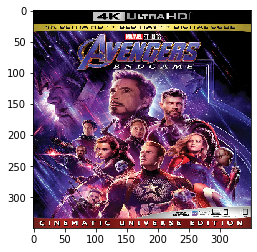

In [50]:
img = image.load_img('endgame.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [65]:
from google.colab import files
uploaded = files.upload()

Saving starwars.jpg to starwars.jpg


Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Action
Comedy
Horror
Thriller


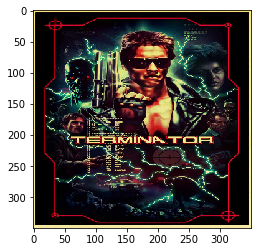

In [69]:
img = image.load_img('terminator.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-8:-1]

for i in range(5):
  print(classes[top3[i]])

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Drama
Comedy
Action
Adventure
Horror


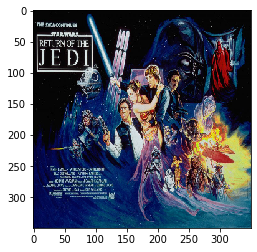

In [68]:
img = image.load_img('starwars.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-8:-1]

for i in range(5):
  print(classes[top3[i]])